Boilingar Bands Strategy

In [74]:
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import numpy as np

In [2]:
api_key = 'iyJXPaZztWrimkH6V57RGvStFgYQWRaaMdaYBQHHIEv0mMY1huCmrzTbXkaBjLFh'
api_secret = 'hmrus7zI9PW2EXqsDVovoS2cEFRVsxeETGgBf4XJInOLFcmIXKNL23alGRNRbXKI'
client = Client(api_key, api_secret)

In [3]:
def get_data(symbol, start):
    frame = pd.DataFrame(client.get_historical_klines(symbol, '1h', start))
    frame = frame.iloc[:, :6]
    frame.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
    frame.set_index('Time', inplace=True)
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float)
    return frame

In [5]:
df = get_data('ETHUSDT', '2023-01-01')

In [7]:
df['rsi'] = ta.momentum.rsi(df.Close)

In [9]:
df['BB_L'] = ta.volatility.bollinger_lband(df.Close)
df['BB_H'] = ta.volatility.bollinger_hband(df.Close)

In [11]:
df.dropna(inplace=True)

In [13]:
df['price'] = df.Open.shift(-1)

In [14]:
df

,Open,High,Low,Close,Volume,rsi,BB_L,BB_H,price
Time,,,,,,,,,
2023-01-01 19:00:00,1200.93,1204.51,1200.92,1201.78,6650.6305,72.621301,1191.568366,1200.989634,1201.77
2023-01-01 20:00:00,1201.77,1204.67,1201.39,1201.40,4423.7644,70.366400,1191.551142,1201.737858,1201.40
2023-01-01 21:00:00,1201.40,1203.08,1200.65,1202.85,3422.5871,73.719634,1191.232787,1202.739213,1202.85
2023-01-01 22:00:00,1202.85,1203.08,1200.45,1201.03,3264.0509,63.939657,1191.305102,1203.229898,1201.04
2023-01-01 23:00:00,1201.04,1202.49,1199.36,1200.34,10448.5890,60.654329,1191.669971,1203.495029,1200.33
...,...,...,...,...,...,...,...,...,...
2023-12-21 01:00:00,2192.21,2194.59,2182.98,2194.28,11045.1747,45.861353,2174.631568,2250.943432,2194.29
2023-12-21 02:00:00,2194.29,2202.32,2186.49,2191.96,14502.2751,45.101089,2172.978024,2251.224976,2191.96
2023-12-21 03:00:00,2191.96,2202.40,2190.00,2200.61,9126.0689,48.527251,2171.922579,2250.665421,2200.61


In [24]:
in_position = False
equitycurve = []
capital = 10000
last_win_percentage = 0  # Variable to store the percentage gain of the last winning trade

for index, row in df.iterrows():
    if not in_position and row.rsi < 30 and row.Close < row.BB_L:
        buy_price = row.price
        coins = capital / buy_price
        in_position = True
    if in_position and row.rsi > 70 and row.Close > row.BB_H:
        sell_price = row.price
        capital = coins * sell_price
        equitycurve.append(capital)
        in_position = False

        # Calculate the percentage gain and update the capital
        percentage_gain = ((capital / (coins * buy_price)) - 1) * 100
        capital *= (1 + percentage_gain / 100)
        last_win_percentage = percentage_gain

In [25]:
pd.Series(equitycurve)

0     10420.276328
1     11325.304673
2     12194.447350
3     12095.752123
4     11797.055138
5     11682.811726
6     12031.482786
7     13588.919078
8     15033.391073
9     16140.956131
10    17412.118489
11    18561.434488
12    20051.187677
13    20346.412097
14    20261.366706
15    20946.186950
16    21467.547644
17    22508.293801
18    23402.116869
19    23769.436831
20    22577.908849
21    22087.920180
22    23212.966224
23    24224.159152
24    24594.605234
25    24916.720172
26    25670.163945
27    23848.336026
28    23105.768109
29    24381.947318
30    24771.274613
31    25431.928443
32    24309.114794
33    23407.780898
34    25224.211236
35    27017.476309
36    29442.450135
37    32265.320746
dtype: float64

<Axes: >

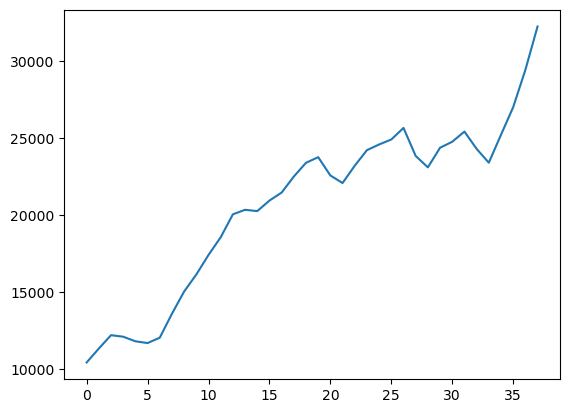

In [26]:
pd.Series(equitycurve).plot()

In [18]:
capital

1814.0527256857993

In [19]:
1814.05/1000


1.81405

In [70]:
def get_data(symbol, start):
    frame = pd.DataFrame(client.get_historical_klines(symbol, '1h', start))
    frame = frame.iloc[:, :6]
    frame.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
    frame.set_index('Time', inplace=True)
    frame.index = pd.to_datetime(frame.index, unit='ms')
    frame = frame.astype(float)
    return frame

In [71]:
df = get_data('ETHUSDT', '2023-01-01')

In [75]:
df['chg'] = np.log(df.Close.pct_change() + 1)

In [76]:
df

,Open,High,Low,Close,Volume,chg
Time,,,,,,
2023-01-01 00:00:00,1196.13,1196.70,1192.72,1194.09,5889.3840,NaN
2023-01-01 01:00:00,1194.09,1196.37,1193.84,1196.02,3157.2079,0.001615
2023-01-01 02:00:00,1196.01,1196.74,1194.11,1195.40,3752.0476,-0.000519
2023-01-01 03:00:00,1195.41,1195.41,1191.71,1194.04,7493.4207,-0.001138
2023-01-01 04:00:00,1194.05,1194.05,1190.57,1192.92,6409.2491,-0.000938
...,...,...,...,...,...,...
2023-12-21 02:00:00,2194.29,2202.32,2186.49,2191.96,14502.2751,-0.001058
2023-12-21 03:00:00,2191.96,2202.40,2190.00,2200.61,9126.0689,0.003938
2023-12-21 04:00:00,2200.61,2206.59,2199.00,2199.54,8362.3324,-0.000486


In [77]:
df['12h_chg'] = df.chg.rolling(12).sum()

In [78]:
df

,Open,High,Low,Close,Volume,chg,12h_chg
Time,,,,,,,
2023-01-01 00:00:00,1196.13,1196.70,1192.72,1194.09,5889.3840,NaN,NaN
2023-01-01 01:00:00,1194.09,1196.37,1193.84,1196.02,3157.2079,0.001615,NaN
2023-01-01 02:00:00,1196.01,1196.74,1194.11,1195.40,3752.0476,-0.000519,NaN
2023-01-01 03:00:00,1195.41,1195.41,1191.71,1194.04,7493.4207,-0.001138,NaN
2023-01-01 04:00:00,1194.05,1194.05,1190.57,1192.92,6409.2491,-0.000938,NaN
...,...,...,...,...,...,...,...
2023-12-21 02:00:00,2194.29,2202.32,2186.49,2191.96,14502.2751,-0.001058,-0.022220
2023-12-21 03:00:00,2191.96,2202.40,2190.00,2200.61,9126.0689,0.003938,-0.020844
2023-12-21 04:00:00,2200.61,2206.59,2199.00,2199.54,8362.3324,-0.000486,-0.010704


In [79]:
df.dropna(inplace=True)

In [80]:
df

,Open,High,Low,Close,Volume,chg,12h_chg
Time,,,,,,,
2023-01-01 12:00:00,1196.35,1198.50,1195.83,1197.17,4418.7365,0.000694,0.002576
2023-01-01 13:00:00,1197.16,1197.29,1193.54,1195.26,4804.4490,-0.001597,-0.000636
2023-01-01 14:00:00,1195.26,1195.86,1194.20,1194.50,3496.2584,-0.000636,-0.000753
2023-01-01 15:00:00,1194.50,1196.81,1194.34,1196.81,2771.4134,0.001932,0.002317
2023-01-01 16:00:00,1196.81,1198.35,1195.88,1197.34,8667.6825,0.000443,0.003698
...,...,...,...,...,...,...,...
2023-12-21 02:00:00,2194.29,2202.32,2186.49,2191.96,14502.2751,-0.001058,-0.022220
2023-12-21 03:00:00,2191.96,2202.40,2190.00,2200.61,9126.0689,0.003938,-0.020844
2023-12-21 04:00:00,2200.61,2206.59,2199.00,2199.54,8362.3324,-0.000486,-0.010704
